<a href="https://colab.research.google.com/github/vamshigarega/DS/blob/master/Extended_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hmmlearn==0.2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached hmmlearn-0.2.6.tar.gz (155 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for hmmlearn: filename=hmmlearn-0.2.6-cp310-cp310-linux_x86_64.whl size=455980 sha256=139c17020143e23388b9a70d4837e12ab361ba89a34a6bae7d920d0bff2f6f7a
  Stored in directory: /root/.cache/pip/wheels/9a/9c/0d/ad94b4e1c2388b051cf78a0207f033b08b2c7d15ede782b431
Successfully built hmmlearn


In [2]:
import numpy as np
import time
from hmmlearn import hmm
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [3]:
def convert_number_system(input_number, input_base, output_base):
    '''
    function that calculates numbers from one base to the other
    returns: int, converted number
    '''
    remainder_list = []
    sum_base_10 = 0
    if output_base == 2:
        binary_repr = bin(input_number)
        return (binary_repr[2:])
    elif input_base != 10:
        reversed_input_number = input_number[::-1]
        hex_helper_dict = {'a' : 10 , 'b' : 11 , 'c' : 12 , 'd' : 13 , 'e' : 14 , 'f' : 15}
        for index, number in enumerate(reversed_input_number):
            for key,value in hex_helper_dict.items():
                if str(number).lower() == key:
                    number = value
            sum_base_10 += (int(number)*(int(input_base)**index))
    elif input_base == 10:
        sum_base_10 = int(input_number)

    while sum_base_10 > 0:
        divided = sum_base_10// int(output_base)
        remainder_list.append(str(sum_base_10 % int(output_base)))
        sum_base_10 = divided
    return_number = ''
    if output_base == 16:
        hex_dict = {10 : 'a' , 11 : 'b' , 12 : 'c' , 13 : 'd' , 14 : 'e' , 15 : 'f'}
        for index, each in enumerate(remainder_list):
            for key, value in hex_dict.items():
                if each == str(key):
                    remainder_list[index] = value
    else:
        for each in remainder_list[::-1]:
            return_number += each

    return (return_number)

In [4]:
def create_seq(y, numStatesOfY, T):
    temp = convert_number_system(y, 10, numStatesOfY)
    templength = len(temp)
    Y = np.zeros(T, dtype=np.int64)
    i = T-templength
    for c in temp:
        Y[i] = ord(c)-48
        i += 1
    return Y

def compute_cost(c, obsLen, currentA):
    cost = 0
    for i in range(obsLen):
        cost += currentA[i]
    return c * cost

In [5]:
class HMM(hmm.MultinomialHMM):

    def __init__(self, n_components):
        super().__init__(n_components)

    def alpha_pass(self, X):
        alphas = self._do_forward_pass(
            self._compute_log_likelihood(X) )[1]
        return alphas

    def beta_pass(self, X):
        betas = self._do_backward_pass(
            self._compute_log_likelihood(X) )
        return betas

For a given w1/w2 value and For for the given optimal attack: Optimal attack :  1 :  [0 0 0 0 1] Compute the expected utility distribution for M=100000 values by redrawing Dirichlet and binomial distribution outcomes. 

In [6]:
def compute_optimal_utility(attack_number, attack_utility, X, M):
  optimal_attack_frame = create_seq(attack_number, 2, len(X))
  original_distributions = []
  for sub in X:
    original_distributions.extend(sub)
  binomial_cost = attack_utility[attack_number];
  best_disruption = [] 
  for i in range(0,len(original_distributions)):
    if(optimal_attack_frame[i]==1):
      best_disruption.append(original_distributions[i]+1)
      binomial_cost += M
    else:
      best_disruption.append(original_distributions[i])
  binomial_utility = binomial_cost
  print("Original Data : ", original_distributions)
  print("Disrupted Data : ", best_disruption)
  return binomial_utility,best_disruption;

Code for Calculating KL Divergence

In [7]:
def calculate_kl_divergence(p, q):
    epsilon = 1e-8  # A small value to avoid division by zero
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    p = p + epsilon
    q = q + epsilon
    return np.sum(p * np.log(p / q))

Code for Plotting distributed disruption

In [8]:
def plot_kl_distributed_disruption(best_disrupted_kl, original_disrupted_kl):
  print("\n 5c Graph ")
  plt.plot(best_disrupted_kl,label='High Uncertainity', color = 'blue')
  plt.plot(original_disrupted_kl,label='Low Uncertainity', color = 'red')
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.ylabel('Kullback - Leiber Divergence')
  plt.title('Distribution Disruption') # As drawn in 5c
  plt.show()

Code for plotting KL Attacks

In [9]:
def plot_box_kl_attacks_utils(utils, original_X):
  utils_lists = [[] for _ in range(6)]
  for i, num in enumerate(utils):
    binary_index = bin(i)[2:]  # Convert index to binary representation (removing '0b' prefix)
    sum_ones = sum(int(bit) for bit in binary_index)
    utils_lists[sum_ones].append(num)
  
  each_attack_util = [list(set(inner_list)) for inner_list in utils_lists]
  attack_utils = []
  for util in each_attack_util:
    replica = []
    for i in range(0,5):
      replica.append(util)
    attack_utils.append(replica)
  
  attack_kl = []
  for util in attack_utils:
    res = calculate_kl_divergence(util,original_X)
    attack_kl.append(res)
  
  box_data = []
  for each_kl in attack_kl:
    attack_output = []
    for i in range(0,31):
      attack_output.append(each_kl)
    box_data.append(attack_output)

  data = box_data
  print("Original Box plot Data : ",attack_kl)
  plt.boxplot(data)
  plt.xlabel('No of Poisioned Observations')
  plt.ylabel('Kullback - Leiber Divergence')
  plt.title('Distribution Disruption - Low Uncertainity')
  plt.show()

Algorithm Filled the gaps in the code with the implementation mentioned in the paper

In [10]:
def poisoned_hmm(timeOfInterest, c, S, M):
    N = transition.shape[0]
    T = len(X)
    M1 = M
    M = emission[0].shape[0]
    A = pow(2, T)
    Y = pow(M, T)
    print("Y : ",Y)
    Y_list = [] 
    P_list = []
    P_hat = np.zeros(N)
    N_list = np.zeros(N)
    utility = np.zeros(N)
    utilities = np.zeros(A)
    utilities_hat = np.zeros(A)
    digammas = np.zeros((Y, N))
    # create Dirichlet distrubtions of model paramters
    P_s = np.zeros((S, N))

    # For S number Dirichlet samples of model
    for s in range(S):
        temp_initial = np.random.dirichlet(initial_copy, 1)
        np.copyto(model_new.startprob_, temp_initial)
        for n in range(N):
            temp_transition = np.random.dirichlet(transition_copy[n], 1)[0]
            np.copyto(model_new.transmat_[n], temp_transition)
            temp_emission = np.random.dirichlet(emission_copy[n], 1)[0]
            np.copyto(model_new.emissionprob_[n], temp_emission)
        alpha = model_new.alpha_pass(X)
        beta = model_new.beta_pass(X)
        for n in range(N):
            P_s[s][n] = alpha[timeOfInterest][n] + beta[timeOfInterest][n]
    sums = P_s.sum(axis=0)

    for n in range(N):
        P_hat[n] = sums[n] / S

    np.copyto(model_new.transmat_, transition_copy)
    np.copyto(model_new.emissionprob_, emission_copy)
    np.copyto(model_new.startprob_, initial_copy)

    # Newly aded code for filling algorithm gaps of Binomial Distributions
    # -------------------------------------------------------------------------
    disrupted_distributions = []
    for y in range(Y):
        for at in range(1,A):
          a_list = create_seq(at, 2, T)
          binomial_draw = np.random.binomial(1, 0.95, 5)
          for i in range(0,len(binomial_draw)):
            flag = 0
            if(a_list[i]==binomial_draw[i]):
              flag=1
              a_list[i] = X[i]+1
            if(flag==1):
              disrupted_distributions.append(a_list)
          a_list = np.array([])
    # -------------------------------------------------------------------------
        # Code for Alpha nd Beta pass of Algorithm 
        y_list = create_seq(y, M, T)
        y_list = np.atleast_2d(y_list).T
        Y_list.append(y_list)
        alpha = model_new.alpha_pass(y_list)
        beta = model_new.beta_pass(y_list)
        for n in range(N):
            digammas[y][n] = alpha[timeOfInterest][n] + beta[timeOfInterest][n]
    alpha = model_new.alpha_pass(X)
    beta = model_new.beta_pass(X)
    P_A = 0.0
    for n in range(N):
        P_A += ((alpha[timeOfInterest][n] + beta[timeOfInterest][n] - P_hat[n]) ** 2)

    for at in range(1,A): # all possible attack/not attack variations. 32 possible (00000, 00001, 00010...)
        print("Attack Number : ",at)
        a_list = create_seq(at, 2, T)
        print("A list ", a_list)
        cost = compute_cost(c, T, a_list)
        print("Cost ", cost)
        for i in range(A):
            if i == 0:
                utilities[at] = P_A
            if i == 1:
                sum = 0.0
                for n in range(N):
                    for y in range(Y):
                        sum += ((digammas[y][n] - P_hat[n]) ** 2)

        # draw = np.random.binomial(1, 0.95, 5)
        # print("Draw : ", draw)

        for m in range(M):
            utilities_hat[at] += utilities[at] - cost
        utilities_hat[0] = P_A

        print("\nAttack   ->  Utility")
        print("------------------------")
        for idx, util in enumerate(utilities_hat):
            print(idx," -> ",util," ; ",end="")
        print("\n===================================\n")

        best_utilities = utilities_hat
    
    # Deriving Expected Utility Distribution for Optimal Attack of [0,0,0,0,1] using Dirichlet and Binomial Samples
    best_utility, best_disruption = compute_optimal_utility(best_utilities.argmax(), best_utilities, X, M1)

    # Returning Maximum Utility, utilities, best_utility
    return utilities_hat.argmax(), utilities_hat, best_utility, disrupted_distributions, best_disruption

In [11]:
def generate_output_file(a_star, elapsed, utilities, X):
    f = open("output.txt", "w")
    print("X: ", X.T, file=f)
    print("\nAttack   :   Utility", file=f)
    print("------------------------", file=f)
    for idx, util in enumerate(utilities):
        print(idx, " : ",util, file=f)
    print("\nOptimal attack : ", a_star, ": ",create_seq(a_star, 2, len(X)), file=f)
    print("\nOptimal attack utility : ", utilities[a_star], file=f)
    print("\nExecution time : ", elapsed, "secs", file=f)
    f.close()

Y :  243
Attack Number :  1
A list  [0 0 0 0 1]
Cost  1

Attack   ->  Utility
------------------------
0  ->  876.3659016986749  ; 1  ->  2626.0977050960246  ; 2  ->  0.0  ; 3  ->  0.0  ; 4  ->  0.0  ; 5  ->  0.0  ; 6  ->  0.0  ; 7  ->  0.0  ; 8  ->  0.0  ; 9  ->  0.0  ; 10  ->  0.0  ; 11  ->  0.0  ; 12  ->  0.0  ; 13  ->  0.0  ; 14  ->  0.0  ; 15  ->  0.0  ; 16  ->  0.0  ; 17  ->  0.0  ; 18  ->  0.0  ; 19  ->  0.0  ; 20  ->  0.0  ; 21  ->  0.0  ; 22  ->  0.0  ; 23  ->  0.0  ; 24  ->  0.0  ; 25  ->  0.0  ; 26  ->  0.0  ; 27  ->  0.0  ; 28  ->  0.0  ; 29  ->  0.0  ; 30  ->  0.0  ; 31  ->  0.0  ; 

Attack Number :  2
A list  [0 0 0 1 0]
Cost  1

Attack   ->  Utility
------------------------
0  ->  876.3659016986749  ; 1  ->  2626.0977050960246  ; 2  ->  2626.0977050960246  ; 3  ->  0.0  ; 4  ->  0.0  ; 5  ->  0.0  ; 6  ->  0.0  ; 7  ->  0.0  ; 8  ->  0.0  ; 9  ->  0.0  ; 10  ->  0.0  ; 11  ->  0.0  ; 12  ->  0.0  ; 13  ->  0.0  ; 14  ->  0.0  ; 15  ->  0.0  ; 16  ->  0.0  ; 17  ->  0.0  

<ipython-input-7-b44f8ce39a7e>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.asarray(p, dtype=np.float)
<ipython-input-7-b44f8ce39a7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  q = np.asarray(q, dtype=np.float)



 5c Graph 


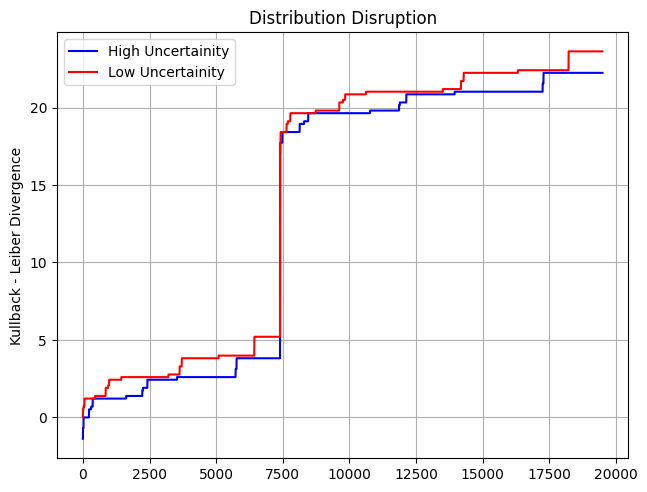

Plotting 6e Graph
Original Box plot Data :  [223093.42157591315, 740568.1882078215, 739647.2211985056, 738726.3399656551, 737805.5446074832, 736884.8352224291]


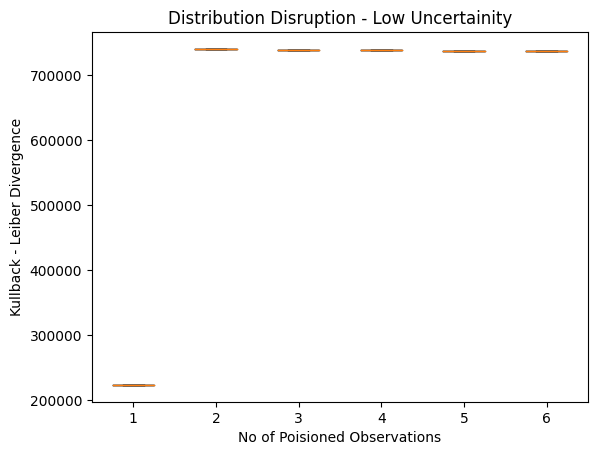

Input Transition states/matrix : (A) 
 [[0.8  0.15 0.05]
 [0.05 0.8  0.15]
 [0.15 0.05 0.8 ]]
Input Observable Probabilities/emission probablities : (B) 
 [[0.15 0.8  0.05]
 [0.2  0.5  0.3 ]
 [0.3  0.2  0.5 ]]
Input Initial State Probabilities : (π) 
 [0.95 0.04 0.01]

*** Results from Poisoned HMM ***

Number of UNIQUES :  6

Optimal attack :  1 ==>  [0 0 0 0 1]

Optimal attack utility :  2626.0977050960246

OPTIMAL UTILITY (with M = 1000000) :  1002626.097705096

Execution time :  5.1981518268585205 secs



In [12]:

if __name__ == "__main__":
    X = np.atleast_2d([0,1,2,2,1]).T

    #These weights can be changed
    w1 = 0.8
    w2 = 0.05

    transition = np.array(((w1, 1 - w1 - w2, w2), (w2, w1, 1 - w1 - w2), (1 - w1 - w2, w2, w1)))
    emission = np.array(((0.15, 0.8, 0.05), (0.2, 0.5, 0.3),(0.3, 0.2, 0.5)))
    initial = np.array((0.95, 0.04, 0.01))

    transition_copy = transition.copy()
    emission_copy = emission.copy()
    initial_copy = initial.copy()

    # Using hmmlearn library and the 3 state model from above

    model_new = HMM(3)
    model_new.transmat_ = transition
    model_new.emissionprob_ = emission
    model_new.startprob_ = initial


    start = time.time()
    # time of interest, cost (c), S (sample Size) and M
    

    # Changes of Cost(c)
    # a_star, utils, optimal_utility, disrupted_distributions, best_disruption = poisoned_hmm(2, 0.001, 1000, 1000000)
    # a_star, utils, optimal_utility, disrupted_distributions, best_disruption = poisoned_hmm(2, 0.01, 1000, 1000000)
    # a_star, utils, optimal_utility, disrupted_distributions, best_disruption = poisoned_hmm(2, 0.1, 1000, 1000000)
    a_star, utils, optimal_utility, disrupted_distributions, best_disruption = poisoned_hmm(2, 1, 1000, 1000000)
    # a_star, utils, optimal_utility, disrupted_distributions, best_disruption = poisoned_hmm(2, 10, 1000, 1000000)
    # a_star, utils, optimal_utility, disrupted_distributions, best_disruption = poisoned_hmm(2, 100, 1000, 1000000)
    # a_star, utils, optimal_utility, disrupted_distributions, best_disruption = poisoned_hmm(2, 1000, 1000, 1000000)


    # Calculating KL Divergence and plotting graph
    # --------------------------------------------------------------------------
    original_X = []
    for sub in X:
      original_X.extend(sub)

    disrupted_distributions_list = [arr.tolist() for arr in disrupted_distributions]
    best_disrupted_kl = []
    original_disrupted_kl = []
    for lis in disrupted_distributions:
      best_disrupted_kl.append(calculate_kl_divergence(lis, best_disruption))
      original_disrupted_kl.append(calculate_kl_divergence(lis, original_X))

    best_disrupted_kl.sort()
    original_disrupted_kl.sort()
    plot_kl_distributed_disruption(best_disrupted_kl, original_disrupted_kl)
    # --------------------------------------------------------------------------
    print("Plotting 6e Graph")
    plot_box_kl_attacks_utils(utils, original_X)


    print("==============================================================")
    print("Input Transition states/matrix : (A) \n", transition)
    print("Input Observable Probabilities/emission probablities : (B) \n", emission)
    print("Input Initial State Probabilities : (π) \n", initial)

    print("==============================================================")
    print("\n*** Results from Poisoned HMM ***")
    print("\nNumber of UNIQUES : ",len(np.unique(utils)))
    elapsed = time.time()-start
    print("\nOptimal attack : ", a_star, "==> ", create_seq(a_star, 2, len(X)))
    print("\nOptimal attack utility : ", utils[a_star])
    print("\nOPTIMAL UTILITY (with M = 1000000) : ",optimal_utility)
    print("\nExecution time : ", elapsed, "secs\n")
    print("==============================================================")
    generate_output_file(a_star, elapsed, utils, X)